# 1. Global Earthquakes

#### In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [101]:
import netCDF4
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.transforms import offset_copy
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")     #ignore  warnings

In [102]:
ds = pd.read_csv("usgs_earthquakes.csv")
df = ds.sort_values(by='mag',ascending=False).head(50).reset_index(drop=True)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,usc000nzvd,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
1,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,usc000rki5,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
2,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,usc000p27i,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
3,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,usc000phx5,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
4,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,usb000pr89,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake


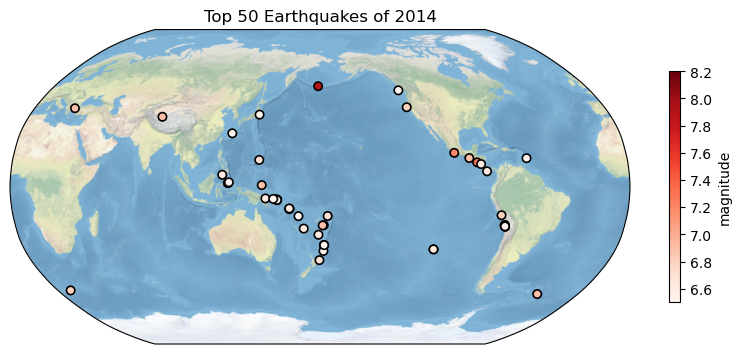

In [103]:
fig = plt.figure(figsize=(10, 5), dpi=100)
proj = ccrs.Robinson(central_longitude=180,globe=None)
ax = plt.axes(projection=proj)
ax.stock_img()    #Load shading terrain raster data from Natural Earth.
ax.set_global()   #Make the map display extend to the maximum range of the projection
ax.set_title('Top 50 Earthquakes of 2014')  #add title
mg = plt.scatter(df['longitude'],df['latitude'], marker='o', c=df['mag'], cmap='Reds', edgecolors='k',linewidths=1.2 , transform=ccrs.PlateCarree())
plt.colorbar(mg,shrink=0.6,format='%.1f',ticks=[6.6,6.8,7.0,7.2,7.4,7.6,7.8,8.0,8.2],label='magnitude')
plt.show()

# 2. Explore a netCDF dataset

#### 2.1 [10 points] Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

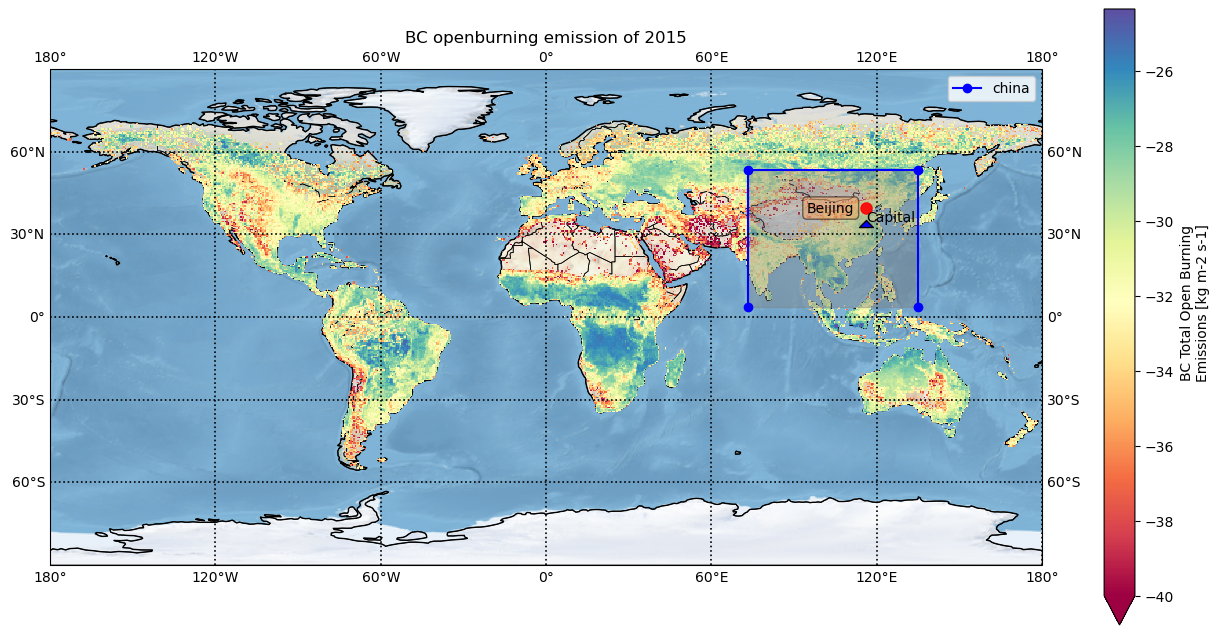

In [99]:
#It takes 1 minutes to run
ds = xr.open_dataset("BC-em-openburning_input4MIPs_emissions_AerChemMIP_IAMC-AIM-ssp370-lowNTCF-1-1_gn_201501-210012.nc", engine="netcdf4")
data = ds.BC_em_openburning.groupby("time.year").mean() 
BC = data.sel(year=2015)
new_BC = BC.where(BC.data != 0, np.nan) 
log_BC= np.log(new_BC)
fig = plt.figure(figsize=(16, 8))
proj = ccrs.PlateCarree()   #a project "PlateCarree"
ax = plt.axes(projection=proj)
ax.set_global()   #Make the map display extend to the maximum range of the projection
ax.stock_img()   #Load shading terrain raster data from Natural Earth.
ax.coastlines()    #add coastlines
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
log_BC.plot(transform=ccrs.PlateCarree(),cmap='Spectral',vmin=-40)
x, y =  [73.33,73.33,135.05,135.05] , [3.51,53.33,53.33,3.51]
ax.plot(x, y, marker='o',color='blue', transform=ccrs.PlateCarree())
ax.fill(x, y, color='grey', transform=ccrs.PlateCarree(), alpha=0.4)

ax.plot(116.25,39.54, marker='o', color='red', markersize=8,
            alpha=0.9, transform=ccrs.Geodetic())    #add point

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-12)  #Text Offset

ax.text(116.25,39.54, 'Beijing',      #add text "Beijing"
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
ax.gridlines(draw_labels=True,linestyle=":",linewidth=1.2,color='k')#add x label and ticks, y label and ticks,gridlines
ax.set_title('BC openburning emission of 2015')  #add title
plt.legend(['china']) #add legend
plt.annotate("Capital",xy = (116.25,35),xytext=(116.25,35),  #add annotate
             arrowprops = {
                'headwidth': 10, 
                'headlength': 5, 
                'width': 4,
                'facecolor': 'b', 
                'shrink': 2, 
             },
            transform=text_transform)
plt.show()

#### 2.2 [10 points] Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

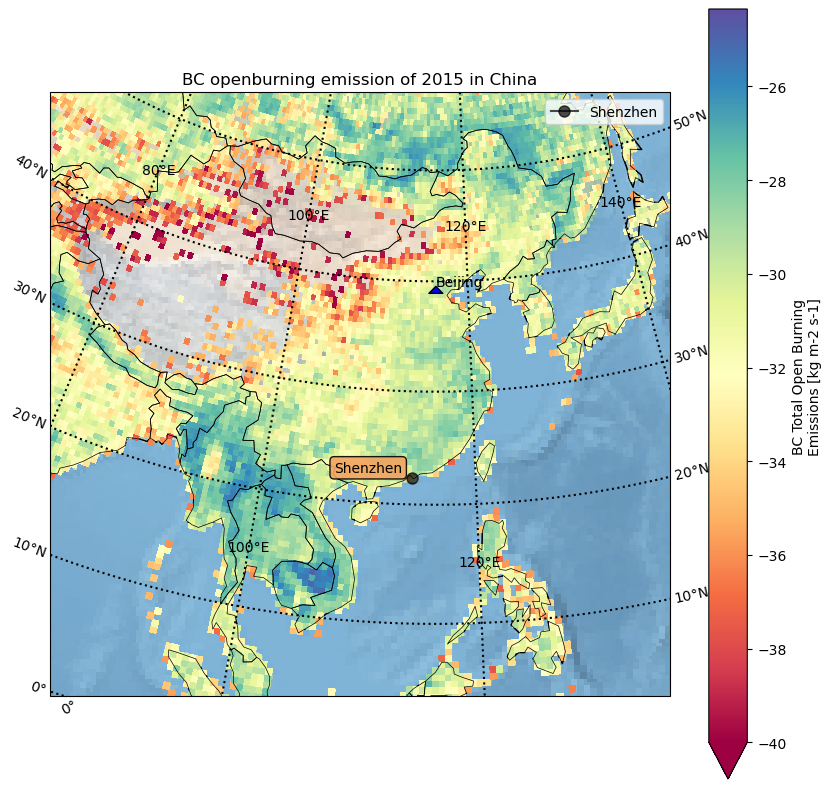

In [98]:
#It takes 2 minutes to run
plt.figure(figsize=(10,10),dpi=100)
central_lon, central_lat = 116.25,39.54 #beijing  Center
proj = ccrs.LambertConformal(central_lon,central_lat)#a different project "LambertConformal"
ax = plt.axes(projection=proj)
ax.set_global()#Make the map display extend to the maximum range of the projection
ax.stock_img() #Load shading terrain raster data from Natural Earth.
ax.coastlines()  #add coastlines
ax.gridlines(draw_labels=True,linestyle=":",linewidth=1.5,color='k') ##add x label and ticks, y label and ticks,gridlines
log_BC.plot(transform=ccrs.PlateCarree(),cmap='Spectral',vmin=-40)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',   #add feature
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
extent = [central_lon-30,central_lon+18,central_lat-35.74,central_lat+14.46] #Range of selection

ax.set_extent(extent)
ax.plot(114.03,22.32, marker='o', color='black', markersize=8,
            alpha=0.7, transform=ccrs.Geodetic())  #add point "shenzhen"

geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-10,y=10) #Text Offset

ax.text(114.03,22.32,'Shenzhen',   #add text box
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown',alpha=0.9, boxstyle='round')) #sandybrown box
ax.set_title('BC openburning emission of 2015 in China')  #add title
ax.legend(["Shenzhen"])  #add legend "Shenzhen"
plt.annotate("Beijing",xy = (116.25,35),xytext=(116.25,35),  #add annotate
             arrowprops = {
                'headwidth': 10, 
                'headlength': 5, 
                'width': 4,
                'facecolor': 'b', 
                'shrink': 2, 
             },
            transform=text_transform)
plt.show()